In [ ]:
import pandas as pd
import sys
sys.path.append('./working_files')
from working_files.functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from openbb import obb
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.stattools import adfuller
obb.user.preferences.output_type = 'dataframe'

In [ ]:
stocks = [
    "AAPL",  # Apple Inc.
    "MSFT",  # Microsoft Corporation
    "GOOGL", # Alphabet Inc. (Class A)
    "AMZN",  # Amazon.com Inc.
    "META",  # Meta Platforms Inc.
    "NVDA",  # NVIDIA Corporation
    "TSLA",  # Tesla Inc.
    "JPM",   # JPMorgan Chase & Co.
    "V",     # Visa Inc.
    "AMD", # AMD 
    "KO", # Coca Cola
    "SBUX", #Starbucks
    "PEP", # Pepsi
    "GE", # General Electric
    "GM", # General Motors
    "NFLX", # Netflix
    "RBLX", # Roblox
    "SONY", # Sony
    "WMT", # Walmart
    "IBM", # IBM
    "TGT", # target
    "COF" # Capital One,
    # "BRK.B" # berkshire hathaway

]


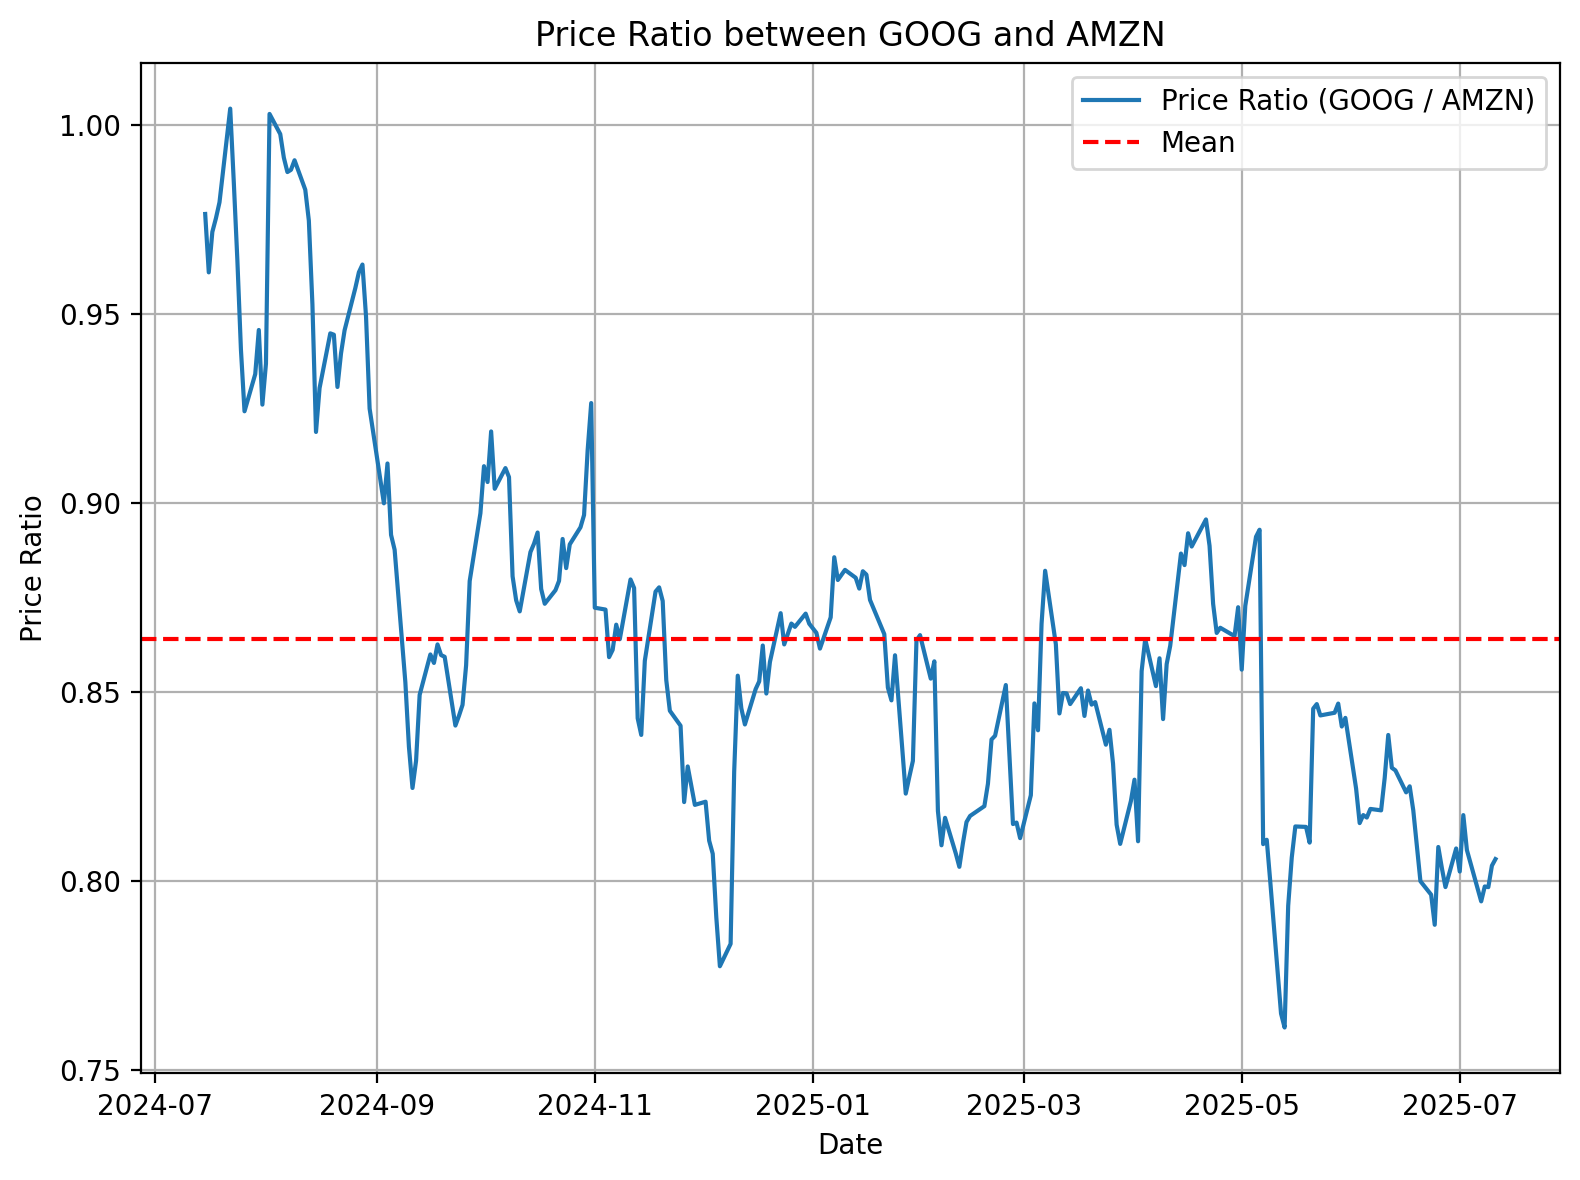

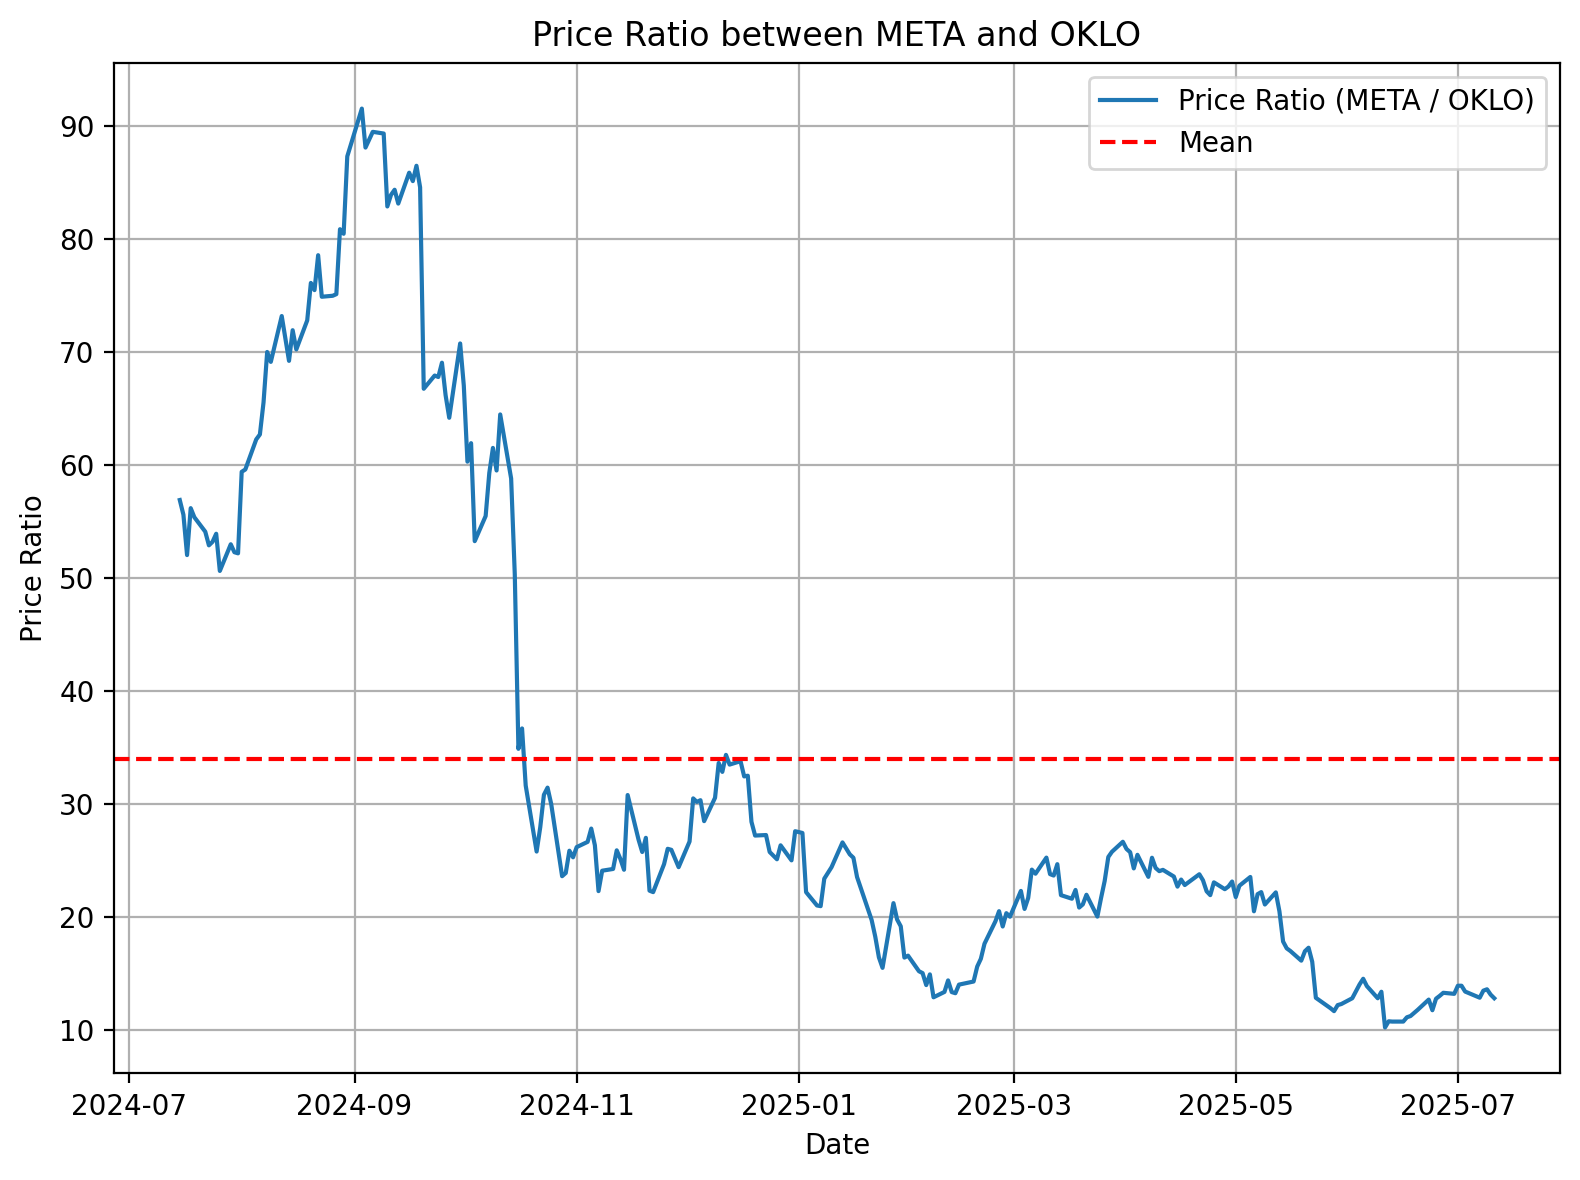

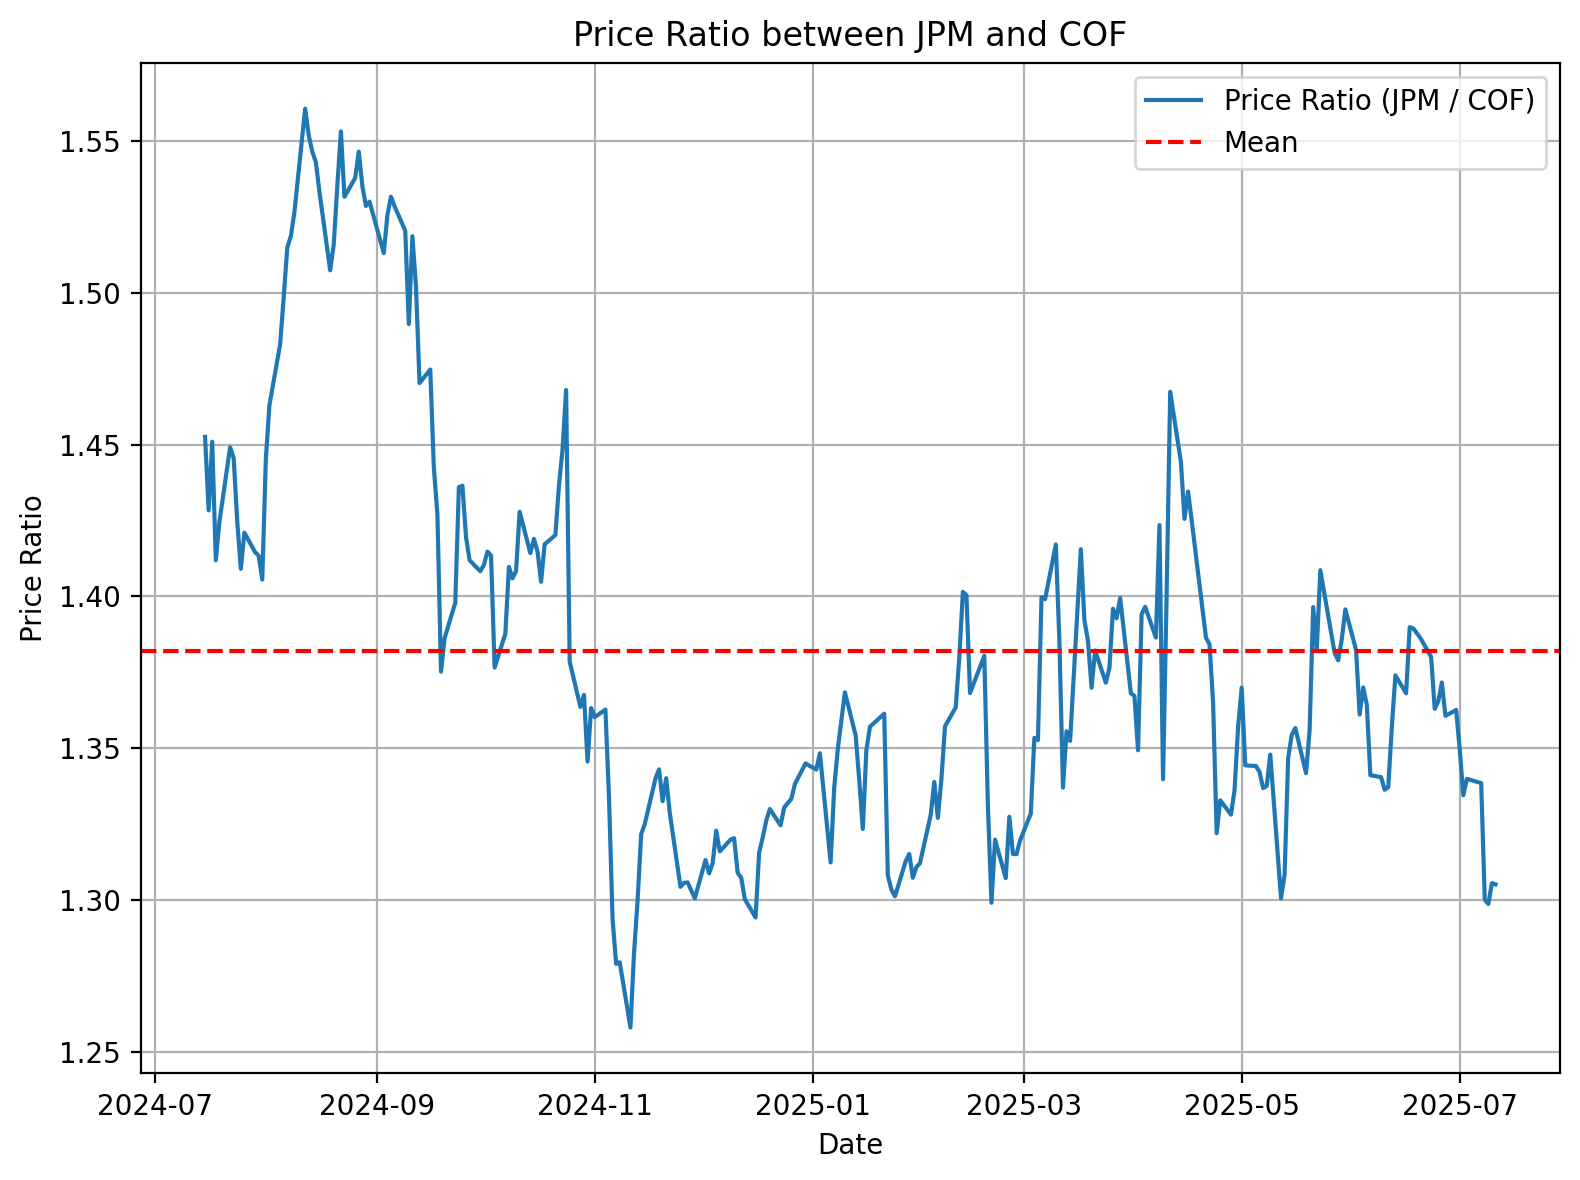

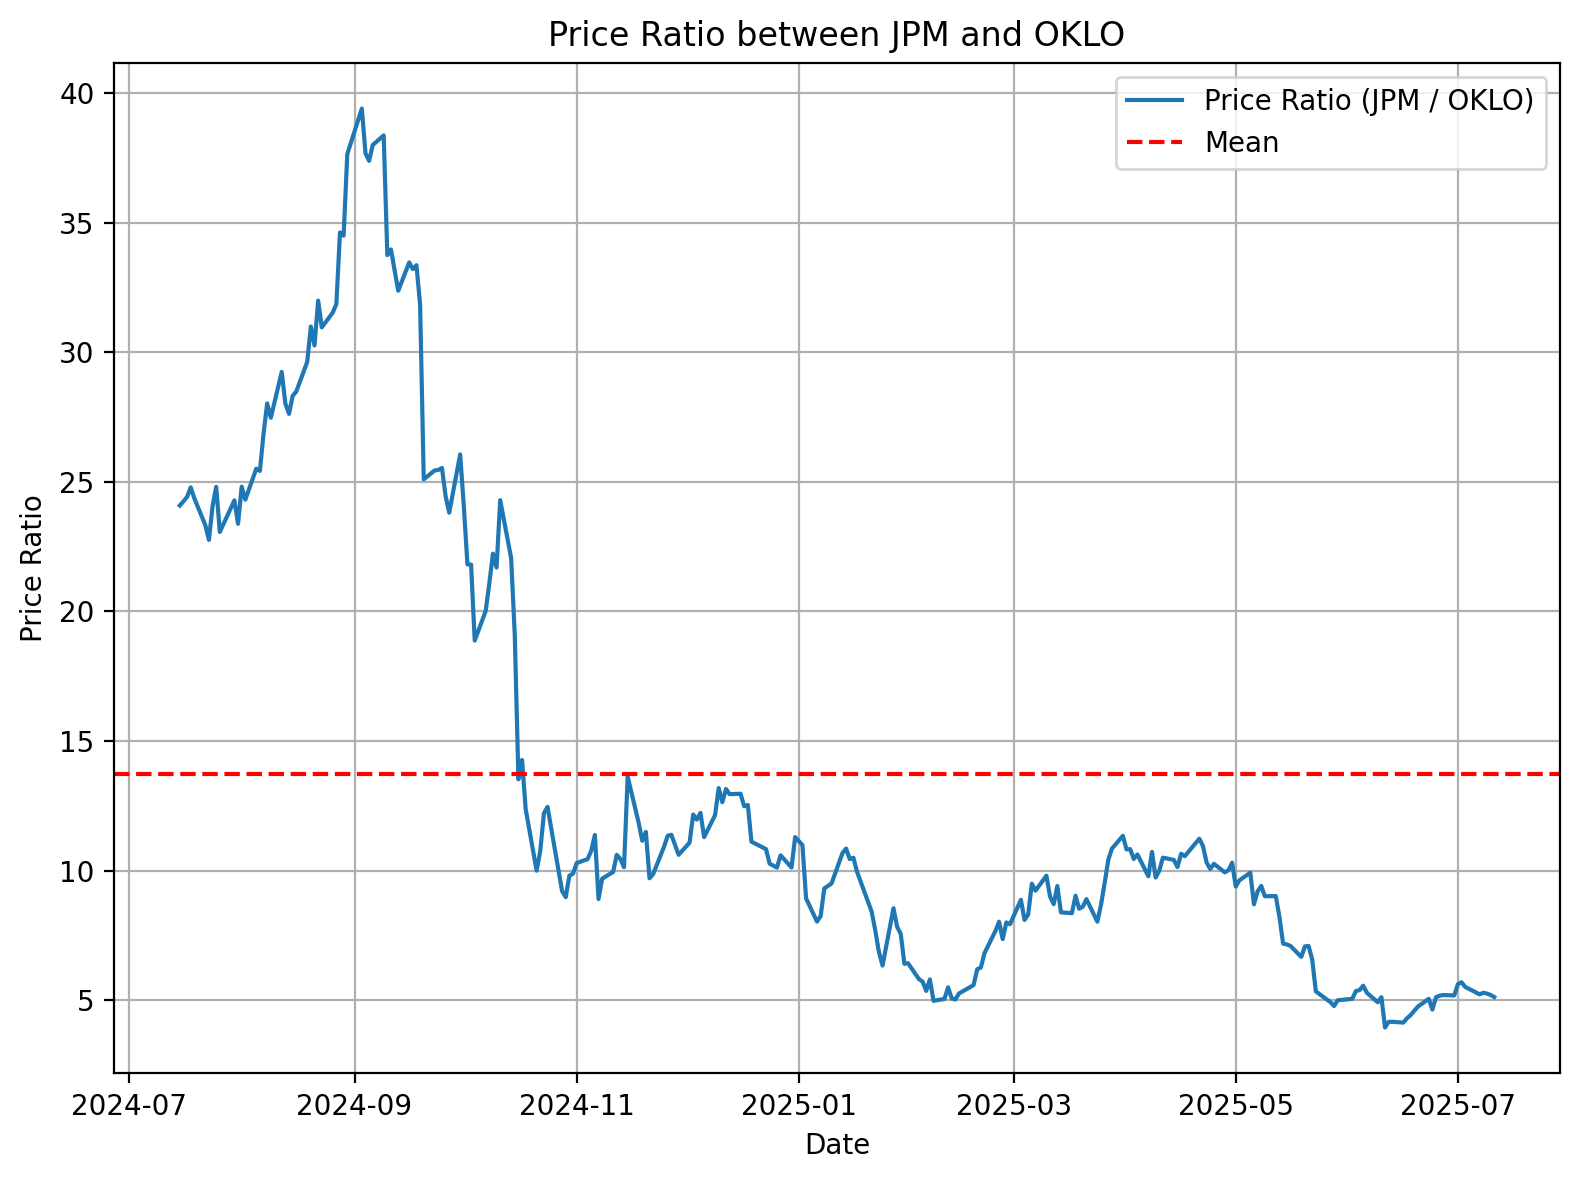

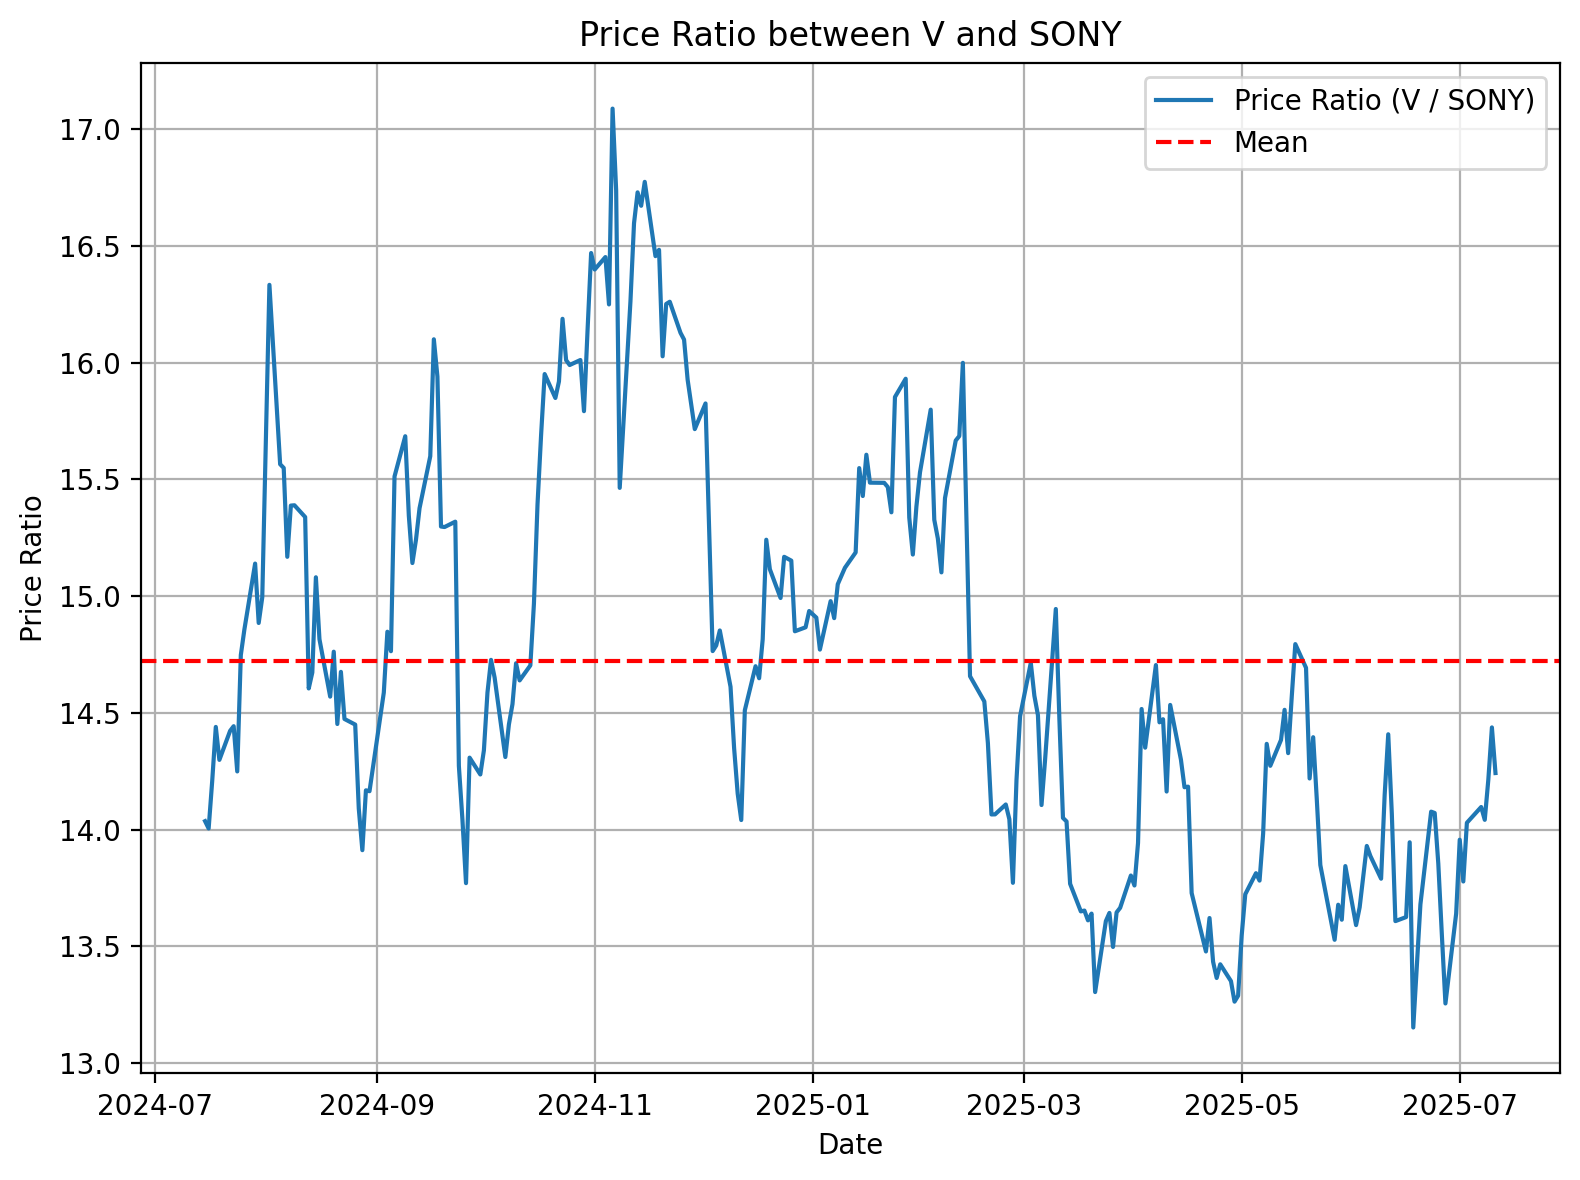

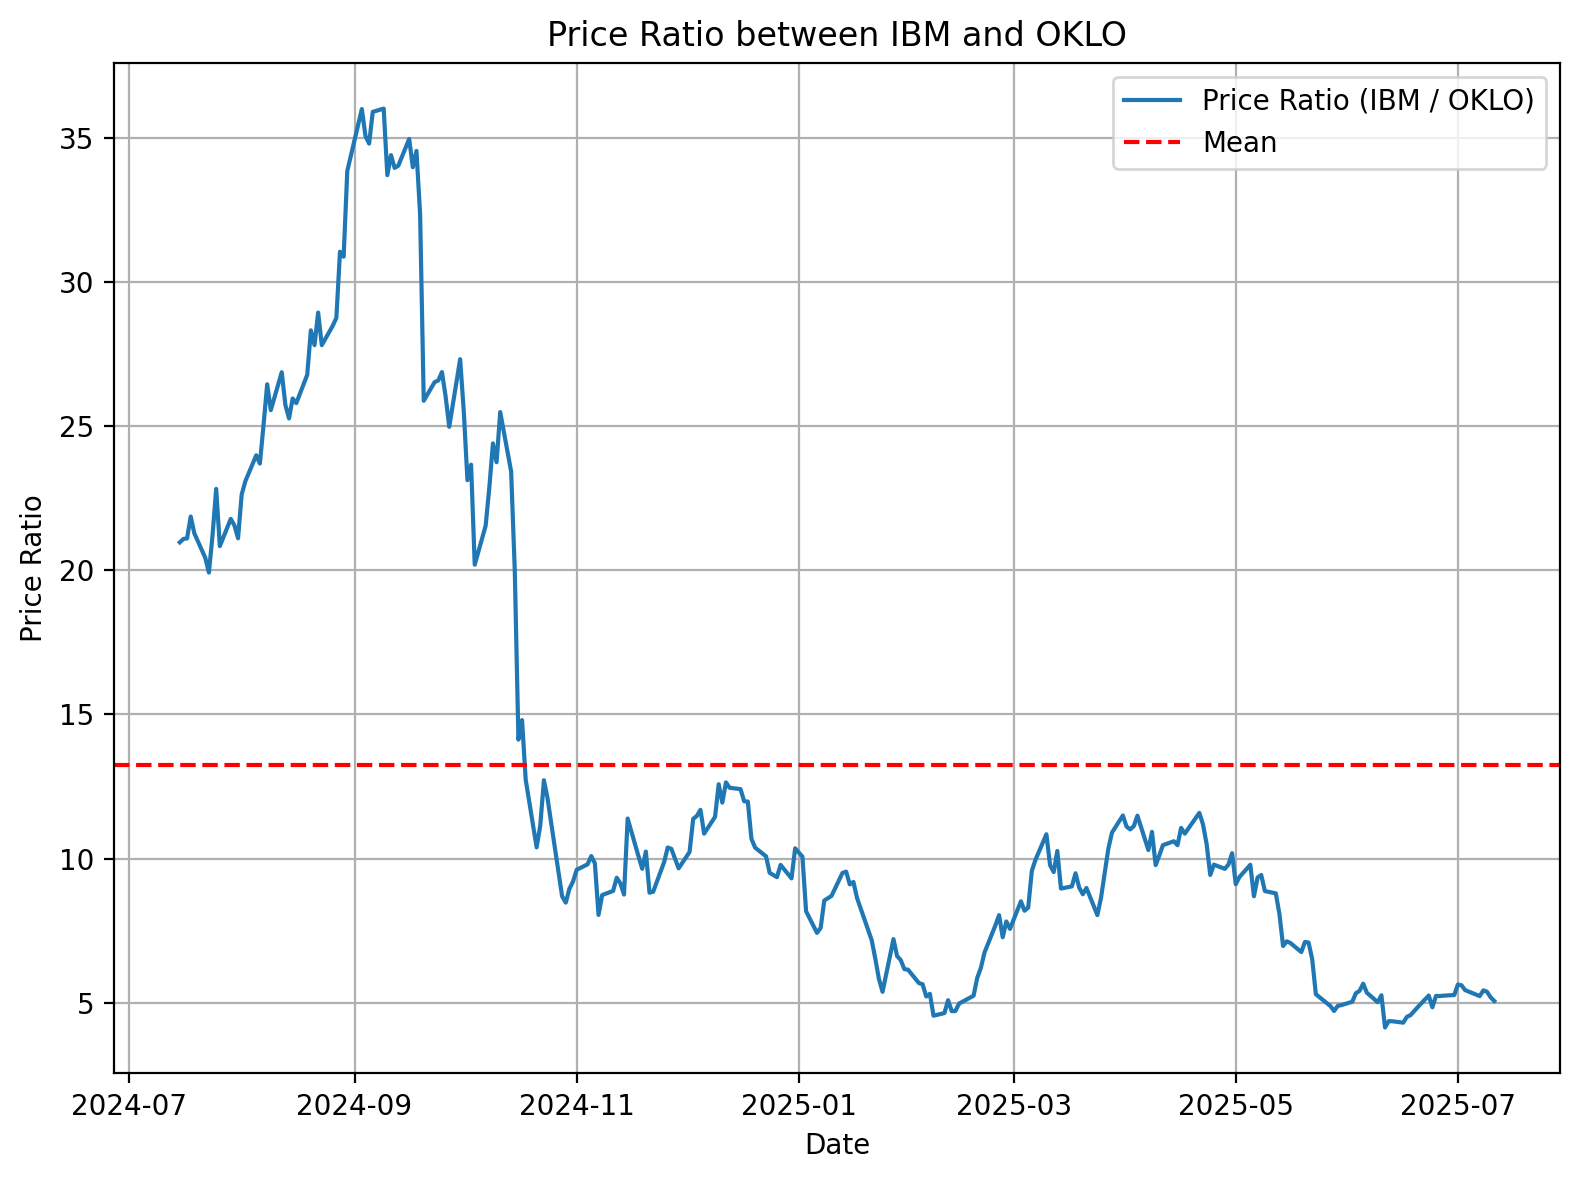

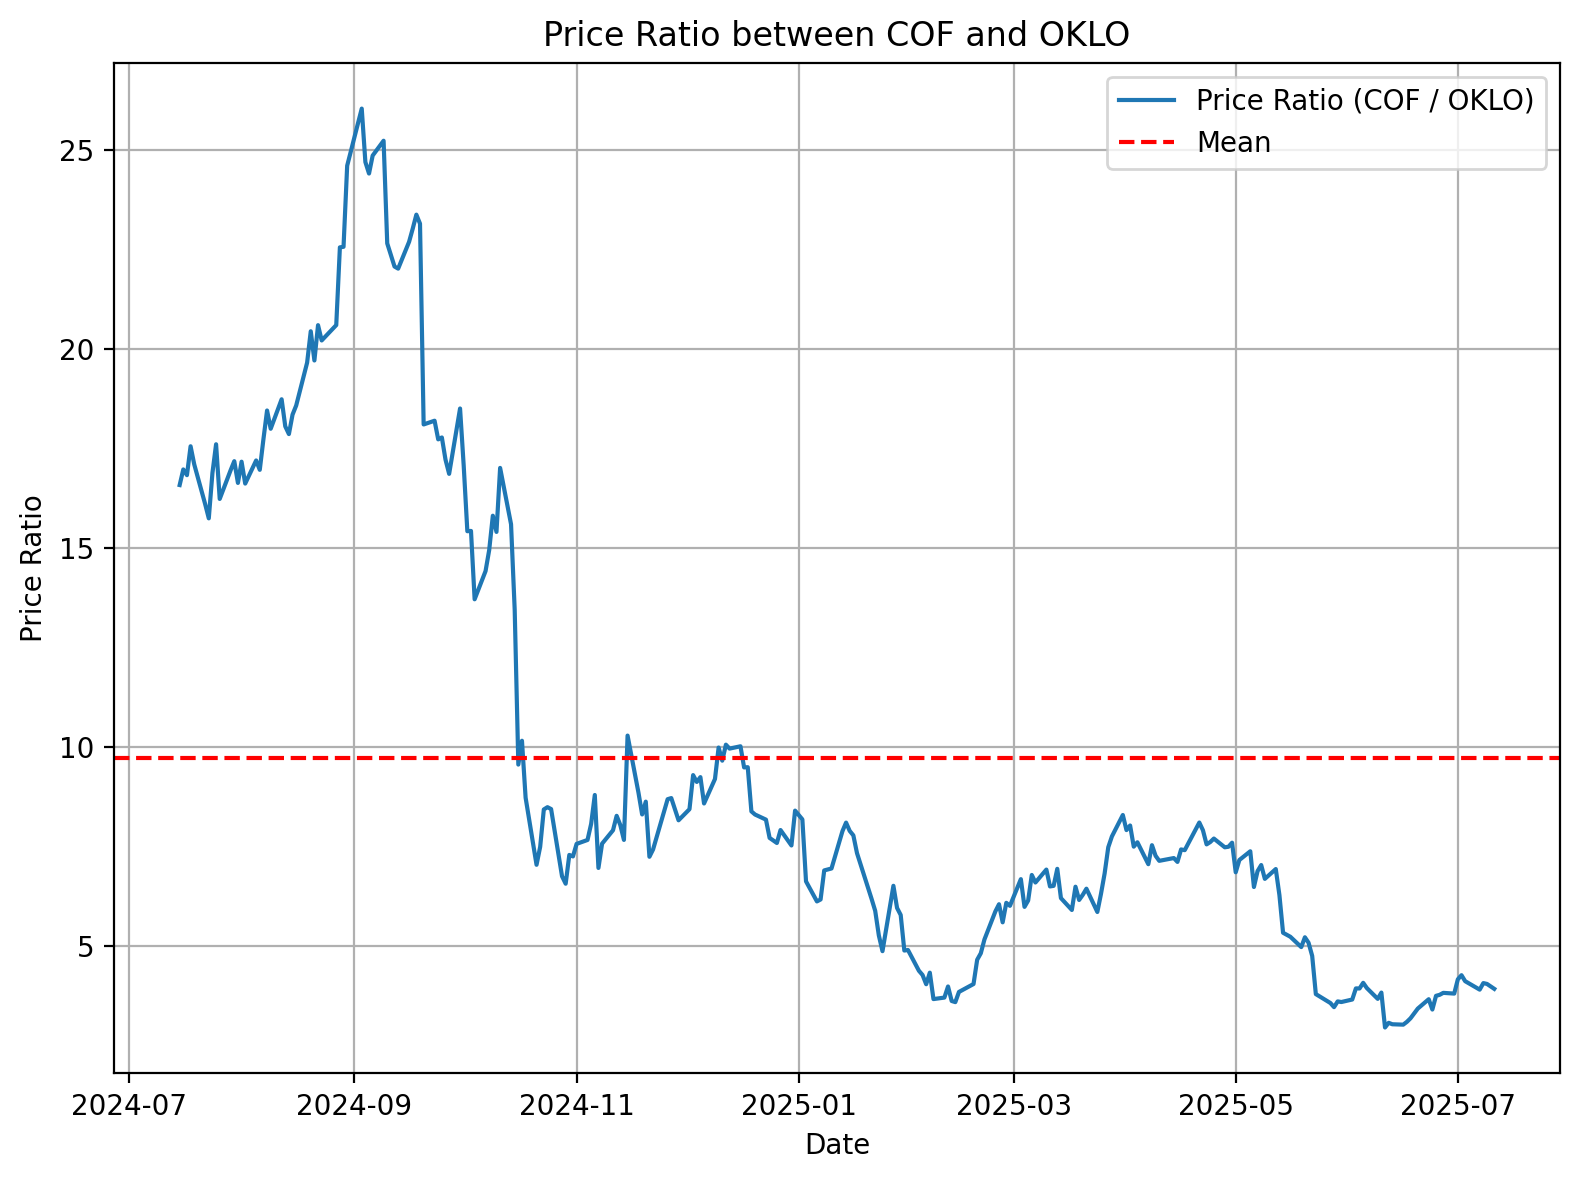

{('GOOG',
  'AMZN'): {'ratio': date
  2024-07-15    0.976494
  2024-07-16    0.961040
  2024-07-17    0.971745
  2024-07-18    0.975347
  2024-07-19    0.979577
                  ...   
  2025-07-07    0.794559
  2025-07-08    0.798505
  2025-07-09    0.798328
  2025-07-10    0.804013
  2025-07-11    0.805751
  Name: close, Length: 249, dtype: float64, 'spread': date
  2024-07-15    -4.529999
  2024-07-16    -7.520004
  2024-07-17    -5.309998
  2024-07-18    -4.529999
  2024-07-19    -3.740005
                  ...    
  2025-07-07   -45.910004
  2025-07-08   -44.199997
  2025-07-09   -44.879990
  2025-07-10   -43.559998
  2025-07-11   -43.710007
  Name: close, Length: 249, dtype: float64, 'pvalue': 0.01828140028843314, 'ADF_stock1': 0.19282727083587514, 'ADF_stock2': 0.5745821607478943, 'ADF_spread': 0.10078838083021985, 'ADF_ratio': 0.04417575490101746},
 ('META',
  'OKLO'): {'ratio': date
  2024-07-15    56.899081
  2024-07-16    55.594777
  2024-07-17    52.025899
  2024-07-18    

In [59]:
def data_collecter(list_stocks):
    stock_data = {}
    for stock in list_stocks:
        df = adding_relevant_columns(stock_insights(obb.equity.price.historical(stock, provider = 'yfinance')))
        stock_data[stock] = df
    return stock_data

all_data = data_collecter(stocks_list)

def combining_stock_data(stocks_of_interest, timeperiod = '2024-01-01'):
    dataframe = pd.DataFrame()
    names = list()
    for name in stocks_of_interest:
        dataframe = pd.concat([dataframe,stock_insights(obb.equity.price.historical(name, provider = 'yfinance'))['close']],
                    axis = 1)
        names.append(name)
        dataframe.columns = names
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe = dataframe[dataframe.index > pd.to_datetime(timeperiod)]
    correlation = dataframe.corr()
    return dataframe, correlation

stock_data, correlation = combining_stock_data(stocks_list)

def identifying_pairs_stocks_highly_correlated(matrix = correlation):
    threshhold = 0.80
    highly_correlated_stocks = {}
    for column in range(len(matrix.columns)):
        for row in range(column + 1, len(matrix)):
            # column value
            col1 = matrix.columns[column]
            # row value
            col2 = matrix.columns[row]
            true_correlation_value = matrix.loc[col1,col2]
            if true_correlation_value > threshhold:
                highly_correlated_stocks[true_correlation_value] = [col1,col2]
    return highly_correlated_stocks



correlated_stocks = identifying_pairs_stocks_highly_correlated()




def calculating_spread(correlated_stocks=correlated_stocks, data_dictionary=all_data, plot = False):
    spreads = {}
    
    for pair in correlated_stocks.values():
        stock1, stock2 = pair[0], pair[1]
        closing_1 = data_dictionary[stock1]['close']
        closing_2 = data_dictionary[stock2]['close']
        
        spread = closing_1 - closing_2
        ratio = closing_1 / closing_2

        # Cointegration and stationarity
        coint_result = ts.coint(closing_1, closing_2)
        pvalue = coint_result[1]

        stock1_ADF_p = adfuller(closing_1)[1]
        stock2_ADF_p = adfuller(closing_2)[1]
        spread_ADF_p = adfuller(spread)[1]
        ratio_ADF_p = adfuller(ratio)[1]

        # Count how many tests pass the 0.05 threshold
        tests_passed = sum([
            pvalue < 0.05,
            stock1_ADF_p < 0.05,
            stock2_ADF_p < 0.05
        ])

        if tests_passed >= 1:
            spreads[(stock1, stock2)] = {
                "ratio" : ratio,
                "spread": spread,
                "pvalue": pvalue,
                "ADF_stock1": stock1_ADF_p,
                "ADF_stock2": stock2_ADF_p,
                "ADF_spread": spread_ADF_p,
                "ADF_ratio": ratio_ADF_p
            }

    
            if plot:
                plt.figure(figsize=(8, 6), dpi=200)
                plt.plot(ratio, label=f'Price Ratio ({stock1} / {stock2})')
                plt.axhline(ratio.mean(), color='red', linestyle='--', label='Mean')
                plt.title(f'Price Ratio between {stock1} and {stock2}')
                plt.xlabel("Date")
                plt.ylabel("Price Ratio")
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()

    return spreads

stock_spread = calculating_spread(plot = True)

stock_spread

In [49]:
def heatmap_of_correlation(correlated_stocks = correlation):
    figure(figsize = (16,10), dpi = 200)
    plotted = sns.heatmap(correlation, annot = True)
    return plotted



In [18]:
<<<<<<< REMOTE CELL DELETED >>>>>>>
def data_collector(list_stocks):
    stock_data = {}
    for stock in stocks:
        df = adding_relevant_columns(stock_insights(obb.equity.price.historical(stock, provider = 'yfinance')))
        stock_data[stock] = df
    return stock_data

def combining_stock_data(stocks_of_interest, timeperiod = '2024-01-01'):
    dataframe = pd.DataFrame()
    names = list()
    for name in stocks_of_interest:
        dataframe = pd.concat([dataframe,stock_insights(obb.equity.price.historical(name, provider = 'yfinance'))['close']],
                    axis = 1)
        names.append(name)
        dataframe.columns = names
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe = dataframe[dataframe.index > pd.to_datetime(timeperiod)]
    correlation = dataframe.corr()
    return dataframe, correlation


data, correlation = combining_stock_data(data_collector(stocks))
    
def identifying_pairs_stocks_highly_correlated(matrix = correlation):
    threshhold = 0.80
    highly_correlated_stocks = {}
    for column in range(len(matrix.columns)):
        for row in range(column + 1, len(matrix)):
            # column value
            col1 = matrix.columns[column]
            # row value
            col2 = matrix.columns[row]
            true_correlation_value = matrix.loc[col1,col2]
            if true_correlation_value > threshhold:
                highly_correlated_stocks[true_correlation_value] = [col1,col2]
    return highly_correlated_stocks

correlation = identifying_pairs_stocks_highly_correlated()


def combining_stock_data(stocks_of_interest, timeperiod = '2024-01-01'):
    dataframe = pd.DataFrame()
    names = list()
    for name in stocks_of_interest:
        dataframe = pd.concat([dataframe,stock_insights(obb.equity.price.historical(name, provider = 'yfinance'))['close']],
                    axis = 1)
        names.append(name)
        dataframe.columns = names
    dataframe.index = pd.to_datetime(dataframe.index)
    dataframe = dataframe[dataframe.index > pd.to_datetime(timeperiod)]
    correlation = dataframe.corr()
    return dataframe, correlation

def calculating_spread(correlated_stocks = correlation):
    spreads = {}
    for pair in correlated_stocks.values():
        stock1,stock2 = pair[0], pair[1]
        spread = data_collector(stock1)[stock1]['close'] -  data_collector(stock2)[stock2]['close']
        spreads[stock1,stock2] = spread.abs()
    return spreads

spread = calculating_spread()

print(correlation)
print(spread)


{0.8118910268773318: ['GOOGL', 'AMZN']}
{('GOOGL', 'AMZN'): date
2024-07-08    10.259995
2024-07-09    10.360001
2024-07-10     8.610001
2024-07-11     9.479996
2024-07-12     9.419998
                ...    
2025-06-30    43.160004
2025-07-01    44.620010
2025-07-02    41.279999
2025-07-03    43.880005
2025-07-07    46.600006
Name: close, Length: 250, dtype: float64}


Text(0.5, 1.0, 'Price Ratio between visa and jpm')

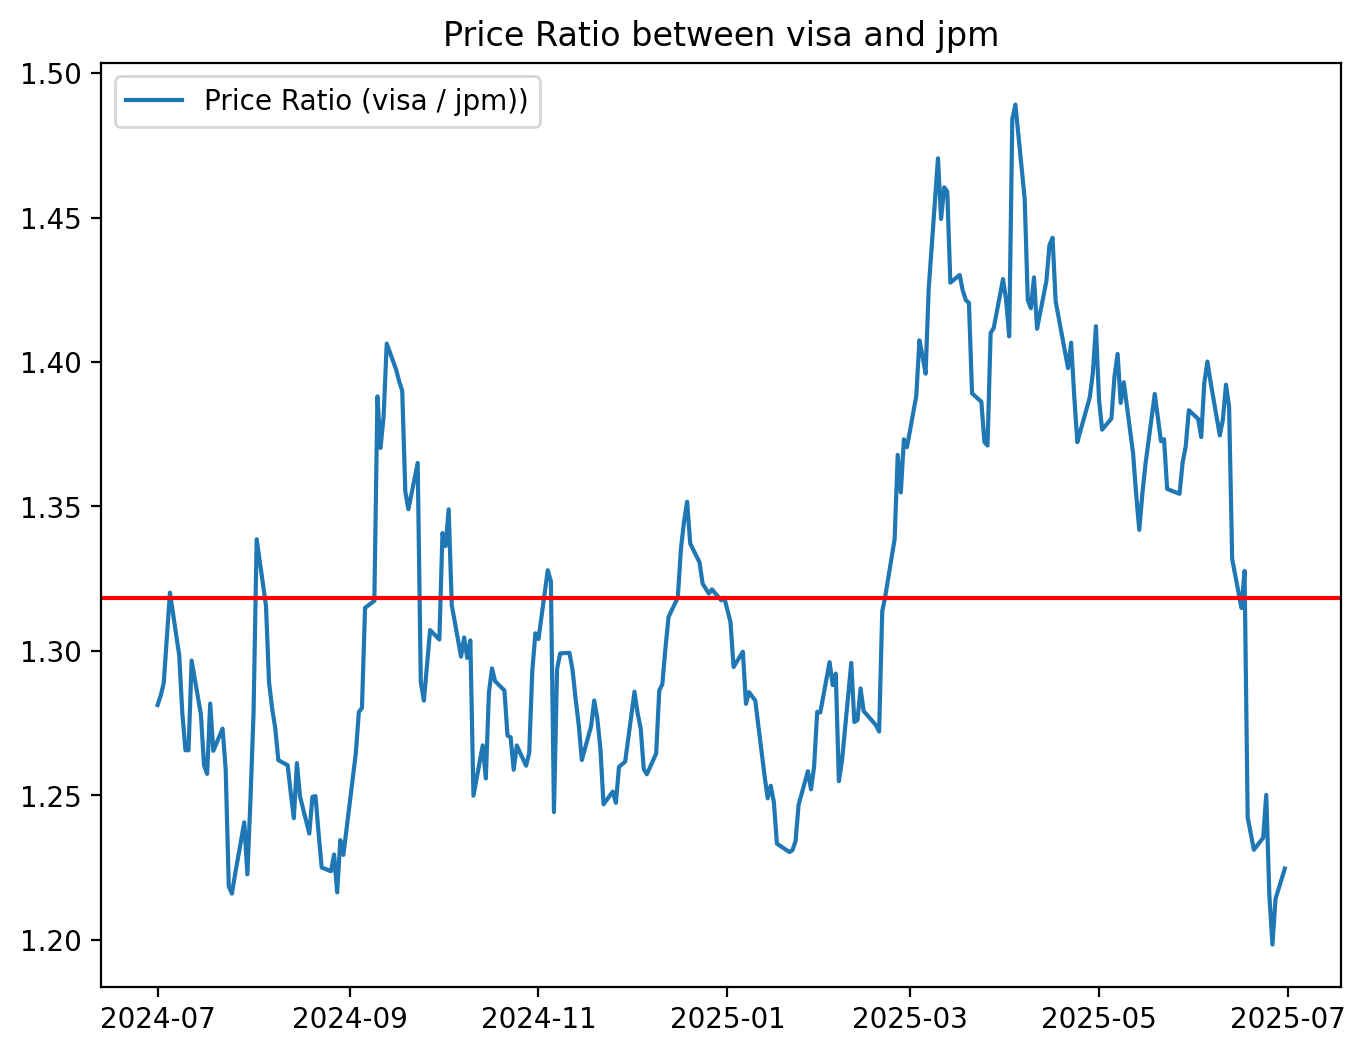

In [321]:
# Also, we can take a look at the price ratios between the two time series.



def price_ratio_graph():
    for 
    
figure(figsize=(8, 6), dpi=200)
ratio = closing_v / closing_jpm
plt.plot(ratio, label = 'Price Ratio (visa / jpm))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between visa and jpm")

In [333]:

figure(figsize=(8, 6), dpi=200)
# Calculate the Zscores of each row.
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Visa to JPM')
plt.show()


In [327]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between VISA and JPM with 5 day and 20 day Moving Averages')
plt.show()

In [329]:
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

In [331]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship Visa to JPM')
plt.show()

In [238]:
# this is typically the functions we use for importing fundamental data
obb.equity.fundamental.metrics(
    "AAPL",
    provider = "yfinance")

In [239]:
options = obb.derivatives.options.chains('AAPL', provider="yfinance")
options.head()